In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_val_score, GridSearchCV


In [207]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv")

In [208]:
df

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [209]:
col_names = ['Id number', 'RI: refractive index', 'Na: Sodium', 'Mg: Magnesium', 'Al: Aluminum', 
             'Si: Silicon', 'K: Potassium', 'Ca: Calcium', 'Ba: Barium', 'Fe: Iron', 'Type of glass']


In [210]:
df.head()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [211]:
df.tail()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
208,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [212]:
df.shape

(213, 10)

In [48]:
df.dtypes

1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1            int64
dtype: object

In [49]:
df.columns

Index(['1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75', '0.00',
       '0.00.1', '1'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1.52101  213 non-null    float64
 1   13.64    213 non-null    float64
 2   4.49     213 non-null    float64
 3   1.10     213 non-null    float64
 4   71.78    213 non-null    float64
 5   0.06     213 non-null    float64
 6   8.75     213 non-null    float64
 7   0.00     213 non-null    float64
 8   0.00.1   213 non-null    float64
 9   1        213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [51]:
df.isnull().sum()

1.52101    0
13.64      0
4.49       0
1.10       0
71.78      0
0.06       0
8.75       0
0.00       0
0.00.1     0
1          0
dtype: int64

In [52]:
df.isnull().sum().sum()

0

In [53]:
df.describe()

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [54]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.52152    3
1.51590    3
1.51645    3
1.51761    2
1.51613    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: 1.52101, Length: 177, dtype: int64


13.21    5
13.02    5
13.00    5
12.85    4
12.86    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: 13.64, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
3.46     1
3.73     1
3.97     1
3.89     1
1.78     1
Name: 4.49, Length: 93, dtype: int64


1.54    8
1.19    6
1.56    5
1.29    5
1.43    5
       ..
1.61    1
0.88    1
1.05    1
0.65    1
1.94    1
Name: 1.10, Length: 117, dtype: int64


72.99    4
73.10    4
72.86    4
73.28    4
73.11    4
        ..
70.57    1
73.81    1
72.92    1
73.55    1
73.61    1
Name: 71.78, Length: 132, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: 0.06, Length: 65, dtype: int64


8.03    5
8.43    5


Data Visualization

In [32]:
sns.set(style='ticks', color_codes=True) 
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

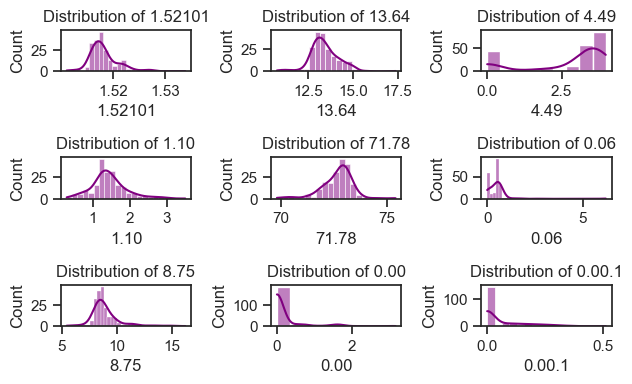

In [33]:
for i , column in enumerate(df.columns[:-1]):
    plt.subplot(4,3,i+1)
    sns.histplot(df[column], kde=True, color ='purple')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

In [34]:
df.skew()

1.52101    1.639658
13.64      0.457318
4.49      -1.154323
1.10       0.900017
71.78     -0.744546
0.06       6.549276
8.75       2.040591
0.00       3.406749
0.00.1     1.747173
1          1.108861
dtype: float64

In [35]:
duplicate_rows=df[df.duplicated()]
print(duplicate_rows)

    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1
38  1.52213  14.21  3.82  0.47  71.77  0.11  9.57   0.0     0.0  1


In [36]:
unique_rows=df[~df.duplicated()]
print(unique_rows)

     1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1
0    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00    0.00  1
1    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00    0.00  1
2    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00    0.00  1
3    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00    0.00  1
4    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00    0.26  1
..       ...    ...   ...   ...    ...   ...   ...   ...     ... ..
208  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06    0.00  7
209  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59    0.00  7
210  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64    0.00  7
211  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57    0.00  7
212  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67    0.00  7

[212 rows x 10 columns]


In [37]:
# Check for outliers using box plots or scatter plots

In [61]:
df["1"]=df["1"]
df["1"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: 1, dtype: int64

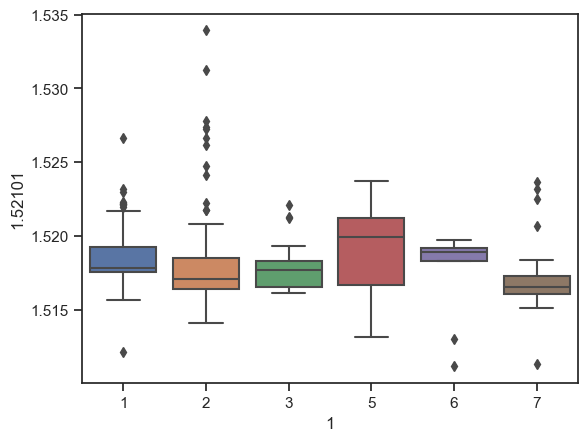

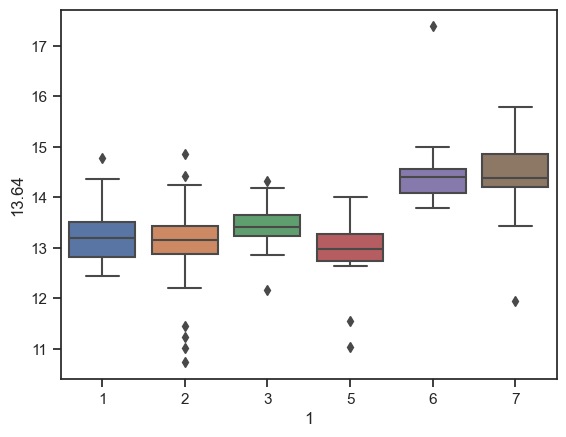

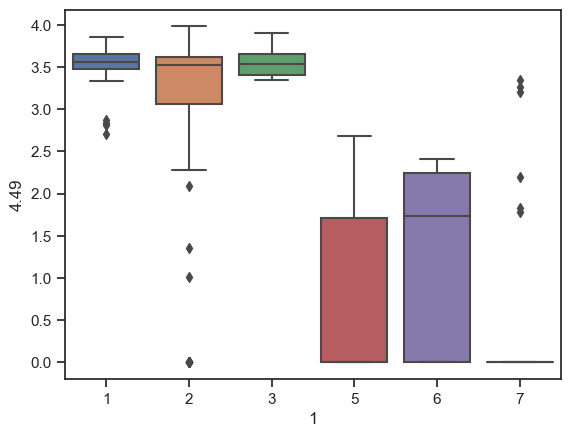

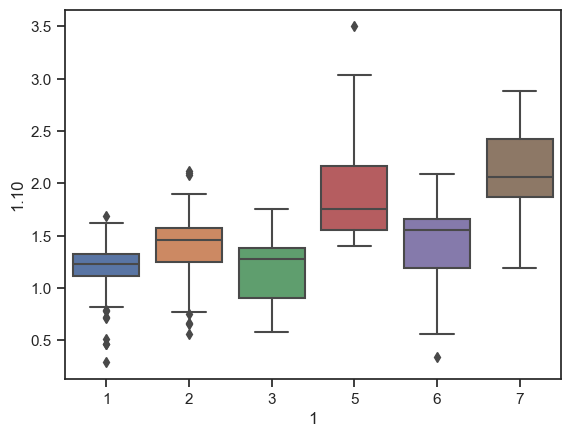

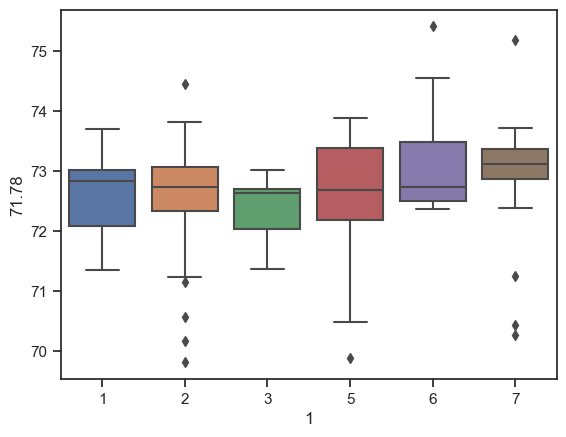

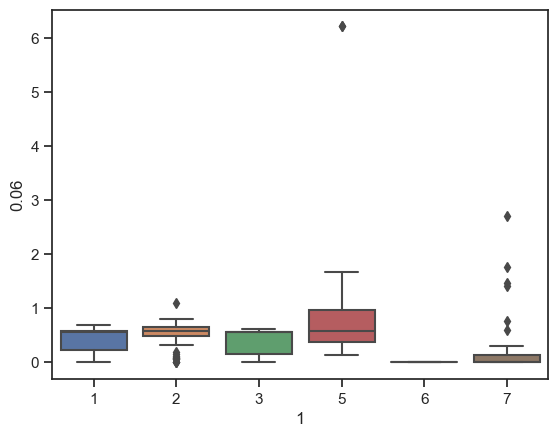

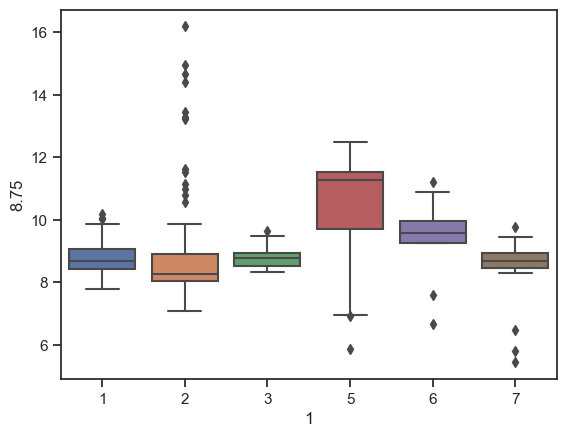

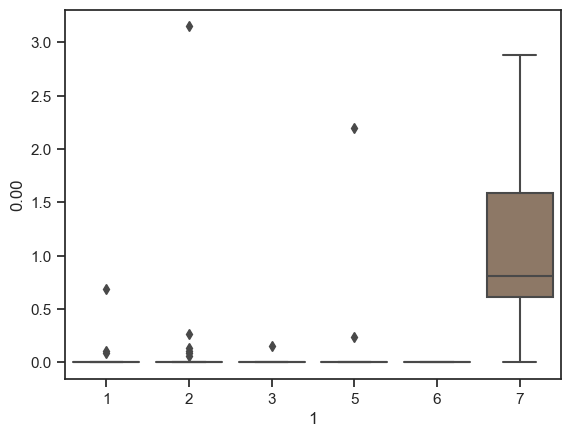

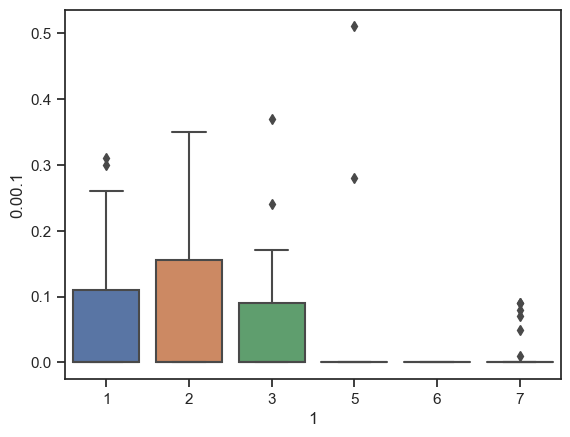

In [62]:
feature_names=df.columns
for i in range(len(feature_names) -1):
    figure=plt.figure()
    ax=sns.boxplot(x='1',y=feature_names[i], data=df)

In [63]:
print(df.head())

   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83   0.0    0.00  1
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0.0    0.00  1
2  1.51766  13.21  3.69  1.29  72.61  0.57  8.22   0.0    0.00  1
3  1.51742  13.27  3.62  1.24  73.08  0.55  8.07   0.0    0.00  1
4  1.51596  12.79  3.61  1.62  72.97  0.64  8.07   0.0    0.26  1


In [64]:
df

,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


<Figure size 2000x1500 with 0 Axes>

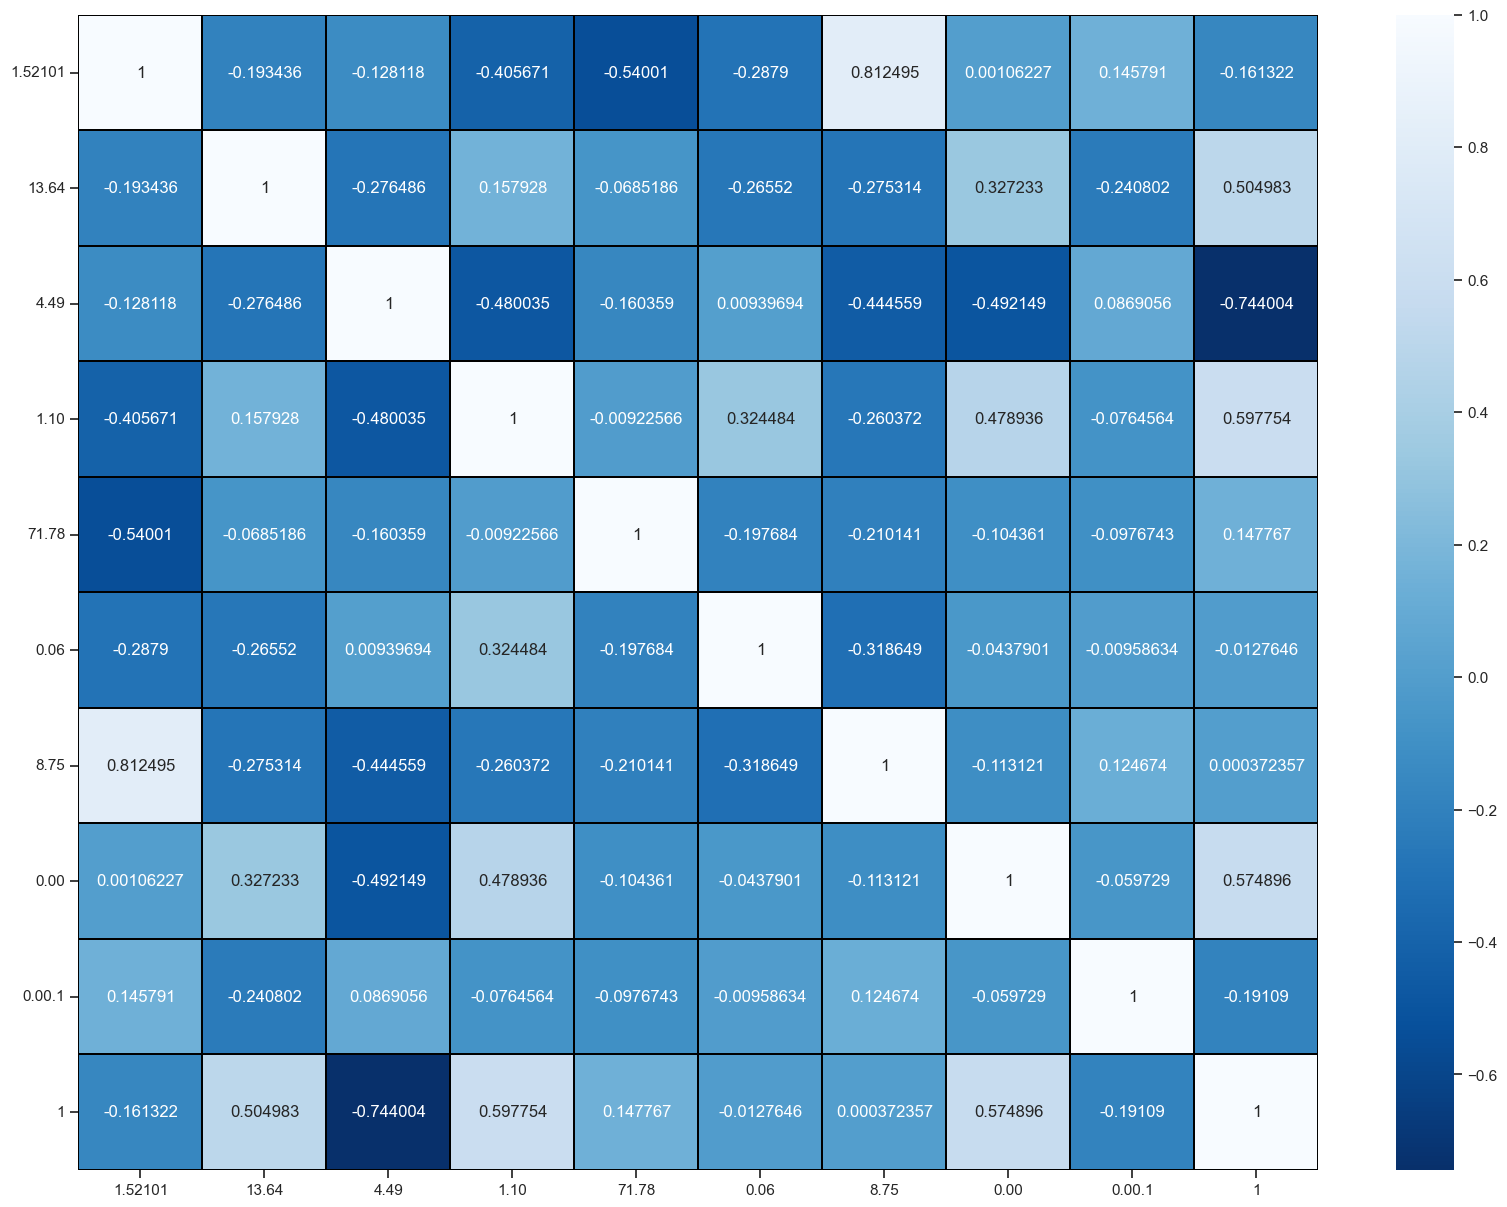

In [78]:
plt.figure(figsize=(20,15))
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths= 0.1, fmt="1g",linecolor="Black",annot=True, cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

In [134]:
#remove outliers

def outlier_hunt(df):
    
    outlier_indices=[]
    
    #iteret over the featues (columns)
    for col in df.columns.tolist():
        #1st quartile(25%)
        Q1=np.percentile(df[col],25)
        
        #3rd quartile(75%)
        Q3=np.percentile(df[col],75)
        
        #Interquartile rrangr(IQR)
        IQR = Q3-Q1

        #OUTLIERS STEP
        outlier_step=1.5*IQR
        
     # a list of indices of outliers for featur col
    Outlier_list_col= df(df[col]<Q1 - outlier_step)| (df[col]>Q3 + outlier_step).Index
    outlier_indices.extend(outlier_list_col)
    
    #select observations containing more than 2 outliers
    outlier_indices = counter(outlier_indices)
    multiple_outliers= list(k for k ,v in outlier_indices.item() if v>2)
    return multiple_outliers



In [136]:
df.shape

(213, 10)

In [137]:
df["1"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: 1, dtype: int64

In [138]:
# Define the input and output data
X = df.iloc[:, 1:-1]  # Features (refractive index to Iron)
y = df.iloc[:, -1]   # Target variable (Type of glass)


In [139]:
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [140]:
# Label encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [141]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [151]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [152]:
# Train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [153]:
# Make predictions on the test data
y_pred = rfc.predict(X_test)



In [154]:
y_pred

array([1, 5, 0, 5, 1, 1, 0, 1, 1, 0, 1, 3, 1, 1, 4, 3, 5, 1, 0, 1, 1, 5,
       5, 5, 0, 3, 0, 1, 4, 0, 0, 1, 2, 1, 1, 5, 3, 0, 1, 1, 0, 1, 0],
      dtype=int64)

In [155]:
y_test

array([0, 5, 0, 5, 1, 1, 0, 1, 1, 1, 4, 3, 1, 1, 4, 3, 5, 0, 0, 5, 1, 5,
       5, 5, 2, 1, 0, 0, 4, 0, 0, 1, 2, 1, 1, 5, 3, 2, 1, 1, 1, 5, 0],
      dtype=int64)

In [156]:
# Calculate the accuracy, precision, recall and F1 score
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)



In [157]:
accuracy

0.7441860465116279

In [158]:
conf_matrix

array([[ 7,  3,  0,  0,  0,  0],
       [ 2, 12,  0,  1,  0,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0],
       [ 0,  1,  0,  0,  2,  0],
       [ 0,  2,  0,  0,  0,  7]], dtype=int64)

In [198]:
classifiers = { 
    "Logistic Regression" : LogisticRegression(max_iter=1000), 
    "KNN" : KNeighborsClassifier(), 
    "Decision Tree" : DecisionTreeClassifier(), 
    "Random Forest" : RandomForestClassifier(random_state=42), 
    "SVC" : SVC() }




In [201]:
scores=[]
scores=[]
for i in range(2,11):
     

    Knn=KNeighborsClassifier(n_neighbors=1)
    Knn.fit(X_train,y_train)
    score=Knn.score(X_test,y_test)
    scores.append(scores)
scores.append(max(scores))
print(Knn.score(X_train,y_train))
print(scores)


1.0
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]


In [202]:
accuracy

0.7441860465116279

In [204]:
for i in range(1):
    lgc=LogisticRegression(random_state=0,solver="lbfgs",multi_class="multinomial",max_iter=100)
    lgc.fit(X_train,y_train)
    score=lgc.score(X_test,y_test)
    scores.append(scores)

print(lgc.score(X_train,y_train))
print(scores)


0.6294117647058823
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]


C:\Users\Raghav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [205]:
for i in range (1):
    tree=DecisionTreeClassifier(random_state=0)
    tree.fit(X_train,y_train)
    score=tree.score(X_test,y_test)
    scores.append(scores)

print(tree.score(X_train,y_train))
print(scores)

1.0
[[...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...], [...]]
